## Introduction

In this week’s discussion section, we will use a dataset containing tweets related to different disasters. For each observation (tweet), there is an outcome variable that classifies the disasters talked about in the tweet as real (1), or not (0). Rather than having multiple predictors as our X, we will have one predictor - the tweet. However, each individual word can be thought of as their own predictor, each contributing to predicting our outcome variable.

## Data

The dataset this week is a commonly used dataset for NLP (Natural Language Processing). The dataset can be found here. Disasters.csv includes a text variable, which contains the tweet as a string. Our target variable, target, is a binary outcome variable with 1 representing the disaster discussed as real, and 0 representing the disaster discussed as not real.

## Excercise

Load in libraries and data

In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score
import re
import string
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
# Read in the data
disaster = pd.read_csv('data/disaster.csv')

## Clean text data

Work with a partner and annotate what each line in the code chunk below is doing.

In [80]:
test = "  THis_is my ^CRazy?. <span> --th&$oingsa[6]"

In [81]:
# Cleaning text data
def preprocess(text):
    # Make all text lowercase
    text = text.lower() 
    # Removes trailing and leading whitespaces
    text=  text.strip()  
    # Remove HTML syntax
    text=  re.sub(r'<.*?>','', text) 
    # Remove all special charaters except underscore
    text = re.sub(r'[^\w\s]','',text) 
    # Remove references
    text = re.sub(r'\[[0-9]*\]',' ',text) 
    # Remove digits
    text = re.sub(r'\d',' ',text) 
    # Collapse multiple spaces into a single space
    text = re.sub(r'\s+', ' ', text) 
    return text

In [83]:
# Apply string cleaning to text variable
disaster['clean_text'] = disaster['text'].apply(preprocess)
disaster.head()

,id,keyword,location,text,target,clean_text
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,our deeds are the reason of this earthquake ma...
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,all residents asked to shelter in place are be...
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,people receive wildfires evacuation orders in...
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,just got sent this photo from ruby alaska as s...


## What about stop words?

In [89]:
# Proof that Tfidf vectorizer excludes stopwords
stop_words_ex = ["On March 5th, I will crush my capstone presentation with my awesome team"]

vectorizer_english = TfidfVectorizer(stop_words = 'english')
vectorizer_english.fit_transform(stop_words_ex)

print("Remaining words")
print(vectorizer_english.get_feature_names_out())

Remaining words
['5th' 'awesome' 'capstone' 'crush' 'march' 'presentation' 'team']


Normally, lemmatization would be a step here to pull out base words, but we would have had to load a package that conflicts with our environment

## Logistic regression

In [91]:
# Split into test and train
X_train, X_test, y_train, y_test = train_test_split(disaster["clean_text"], 
                                                    disaster["target"], 
                                                    test_size = 0.3, 
                                                    random_state = 42)

In [93]:
# Vectorize words
# Tfidf: term frequency invserse document frequency. tells us the most distinctive words in our dataset
tfidf_vectorizer = TfidfVectorizer(stop_words = 'english')
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [95]:
# Initialize a logistic regression model and fit to vectorized training data
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train_tfidf, y_train)
y_pred = lr_model.predict(X_test_tfidf)

## Logistic Regression Results

Accuracy: 0.803415061295972


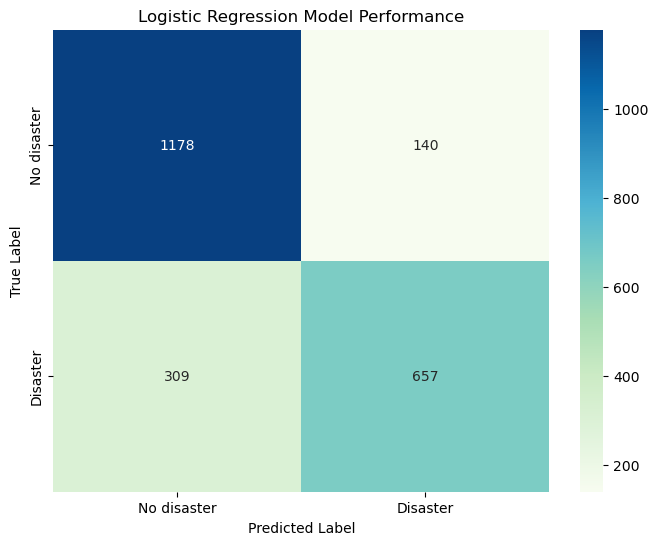

In [96]:
# Calculate LR accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
# Create confusion matrix for correctly/incorrectly predicting outcome variable 
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (8,6))
sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'GnBu',
           xticklabels = ["No disaster", "Disaster"],
           yticklabels = ["No disaster", "Disaster"])
plt.title('Logistic Regression Model Performance')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

## Test model with new data

In [98]:
# Preprocess new phrases
new_text = [
    "BREAKING: Massive earthquake hits the coast",
    "I love watching disaster movies on Netflix",
    "Thousands evacuated as hurricane approaches",
    "Theeeeeeesssss is a disassterrrrr",
    "It's Windy",
    "The Palisades fire has damaged over 7,000 structures",
    "I dropped my pencil and I am too lazy to pick it up myself",
    "Oh no!",
    "WHAT ABOUT THE MEG!?!"
]

# Preprocess new phrases
cleaned_new_text = [preprocess(text) for text in new_text]

# Transform using TF-IDF vectorizer
new_features = tfidf_vectorizer.transform(cleaned_new_text)

# Make predictions
predictions = lr_model.predict(new_features)

# Check outcomes
for text, pred in zip(new_text, predictions):
    print(f"Text: {text}")
    print(f"Prediction: {'Real Disaster' if pred == 1 else 'Not a Real Disaster'}\n")

Text: BREAKING: Massive earthquake hits the coast
Prediction: Real Disaster

Text: I love watching disaster movies on Netflix
Prediction: Not a Real Disaster

Text: Thousands evacuated as hurricane approaches
Prediction: Real Disaster

Text: Theeeeeeesssss is a disassterrrrr
Prediction: Not a Real Disaster

Text: It's Windy
Prediction: Not a Real Disaster

Text: The Palisades fire has damaged over 7,000 structures
Prediction: Not a Real Disaster

Text: I dropped my pencil and I am too lazy to pick it up myself
Prediction: Not a Real Disaster

Text: Oh no!
Prediction: Not a Real Disaster

Text: WHAT ABOUT THE MEG!?!
Prediction: Not a Real Disaster

